# Inserisci titolo grafico qui

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from math import ceil, floor


OUT_FOLDER = 'grafici/AvvistamentiMedi'
FIGURE_SIZE = (20, 8)

%matplotlib inline

In [3]:
DATASET = 'ufos.csv'
data = pd.read_csv(DATASET)
len(data)

80332

In [4]:
# Questo è leeeento
data['datetime'] = pd.to_datetime(data['datetime'])

In [8]:
YEAR_SHIFT = 1906
YEAR_RANGE = (1985, 2012)

def date2index(year, season):
    return 4 * (int(year) - YEAR_SHIFT)  + int(season)

def get_season(m):
    m = int(m)
    if m == 12 or m <= 2: 
        return 0 # inverno
    elif 3 <= m <= 5:
        return 1 # primavera
    elif 6 <= m <= 8:
        return 2 # estate
    elif 9 <= m <= 11:
        return 3 # autunno

def dt_helper(index):
    h = data['datetime'].iloc[index]
    return date2index(h.year, get_season(h.month))

counts = data['datetime'].groupby(dt_helper).size()
seasons_averages = pd.Series(dtype=float)

for year in range(*YEAR_RANGE):
    total = 0
    for season in range(0, 4):  # le stagioni sono 0, 1, 2, 3
        m = date2index(year, season)
        if m not in counts.index:
            total = -1
            break
        total += counts.loc[m]
    if total > 0:
        seasons_averages.loc[date2index(year, 0)] = total / 4.0

monthly_averages = monthly_averages.sort_index()
counts = counts.sort_index()

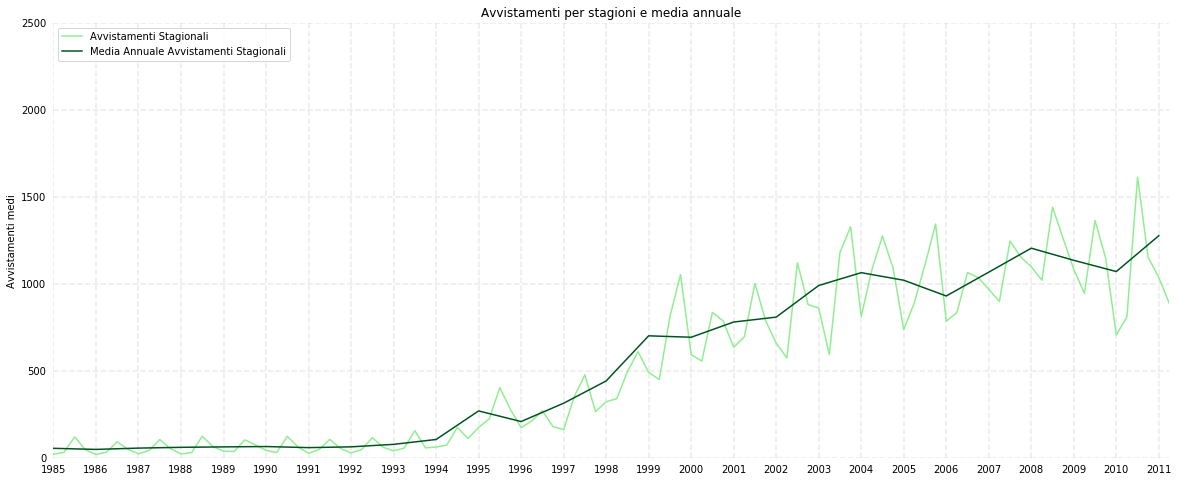

In [9]:
plt.figure(figsize=FIGURE_SIZE)

DARK_COLOR = '#90ee90'
LIGHT_COLOR = '#005221'

ax1 = counts.plot(color=DARK_COLOR, label='Avvistamenti Stagionali')
ax2 = seasons_averages.plot(color=LIGHT_COLOR, label='Media Annuale Avvistamenti Stagionali')

plt.legend()

get_original_year = lambda x: floor(x / 4) + YEAR_SHIFT

year_labels = [str(get_original_year(x)) for x in seasons_averages.index]
plt.xticks(seasons_averages.index, year_labels)

interval_to_show = (date2months(YEAR_RANGE[0], 1), date2months(YEAR_RANGE[1]-1, 4))
ax1.set_xlim(interval_to_show)
ax2.set_xlim(interval_to_show)

ax1.set_ylim((0, 2500))
ax2.set_ylim((0, 2500))

# Rimuovo i bordi del grafico
for spine in ['left', 'right', 'top', 'bottom']:
    ax1.spines[spine].set_visible(False)

# Switch off ticks
ax1.tick_params(
    axis="both", 
    which="both", 
    bottom=False, 
    top=False, 
    labelbottom=True, 
    left=False, 
    right=False, 
    labelleft=True
)

COLOR_LINE = '#cccccc'

vals = ax2.get_xticks()
for tick in vals:
    ax2.axvline(x=tick, linestyle='dashed', alpha=0.4, color=COLOR_LINE, zorder=1)

vals = ax2.get_yticks()
for tick in vals:
    ax2.axhline(y=tick, linestyle='dashed', alpha=0.4, color=COLOR_LINE, zorder=1)

plt.title('Avvistamenti per stagioni e media annuale')
plt.ylabel('Avvistamenti medi')

plt.savefig(f'{OUT_FOLDER}/LineChart.png')
plt.show()